In [1]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('daily_weather.csv')

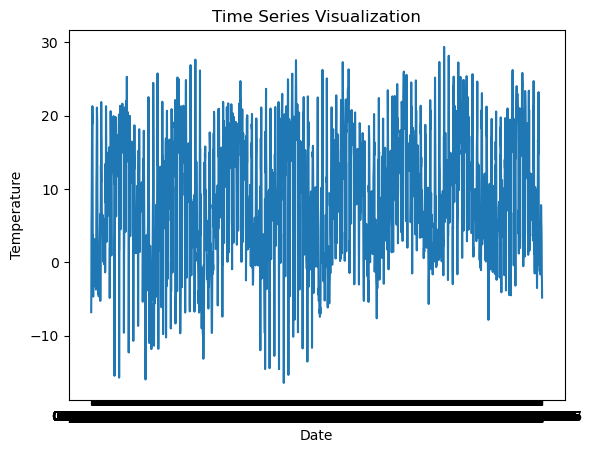

In [3]:
# Visualize the time series

plt.plot(df['date'], df['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Visualization')
plt.show()


In [4]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)
index_frequency = df.index.inferred_freq
print(f"Index frequency: {index_frequency}")




Index frequency: D


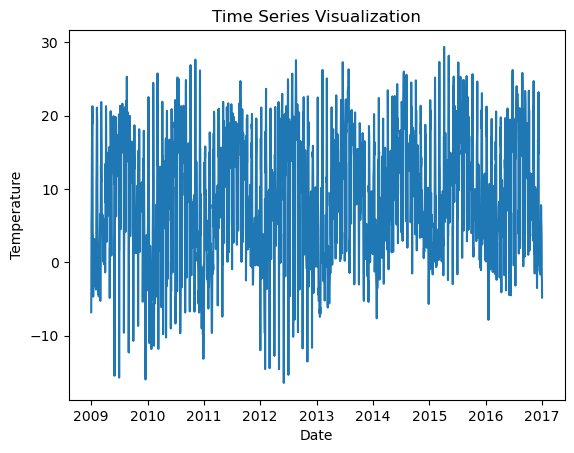

In [5]:
plt.plot(df.index, df['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Visualization')
plt.show()

In [6]:
#check for missing values and fill them if they exist

if df['temperature'].isnull().sum() > 0:
    mean_temperature = df['temperature'].mean()
    df['temperature'].fillna(mean_temperature, inplace=True)

In [7]:
#ex4- split into train and test data

train_size = int(len(df)*0.8)

train, test = df[:train_size], df[train_size:]

In [8]:
#ex5 - make a function to perform slidding window with n independent variables and m dependent variables


def sliding_window(data, n, m):
    X, y = [], []
    for i in range(len(data) - n - m + 1):
        X.append(data.iloc[i:i+n].values)
        y.append(data.iloc[i+n:i+n+m].values)
    return np.array(X), np.array(y)


In [9]:
#ex6 - perform slidding window with n = 5 and m = 1
n = 6  # Number of independent variables
m = 1  # Number of dependent variables

# Apply sliding window transformation to training data
X_train, y_train = sliding_window(train['temperature'], n, m)

# Apply sliding window transformation to testing data
X_test, y_test = sliding_window(test['temperature'], n, m)



In [10]:
#ex7

# Train Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Train Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Train XGBoost Regressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)




In [11]:
#ex7

# Define a function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mape_rf = calculate_mape(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"MAPE: {mape_rf}%")

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mape_lr = calculate_mape(y_test, y_pred_lr)

print("\nLinear Regression:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"MAPE: {mape_lr}%")

# Evaluate XGBoost Regressor
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mape_xgb = calculate_mape(y_test, y_pred_xgb)

print("\nXGBoost Regressor:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"MAPE: {mape_xgb}%")

Random Forest Regressor:
MAE: 3.5552285804472885
MSE: 24.181312147134587
MAPE: 511.1083793342176%

Linear Regression:
MAE: 3.7583586532794686
MSE: 25.591176142659958
MAPE: 146.87813733623034%

XGBoost Regressor:
MAE: 3.8244795905154203
MSE: 28.297304307470284
MAPE: 520.5154254000325%


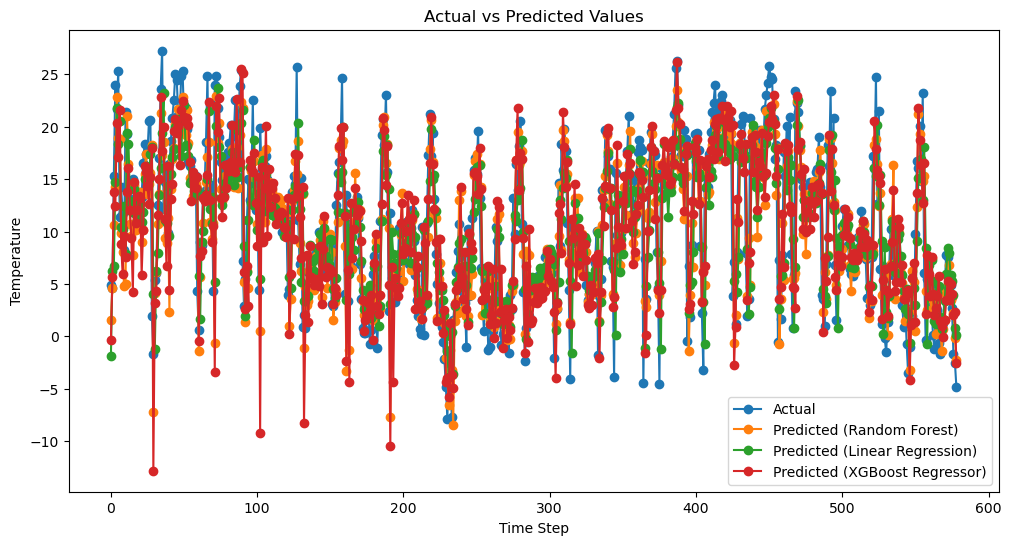

In [12]:
#print(y_test)


# Example with Random Forest Regressor
y_pred_best_rf = y_pred_rf

# Example with Linear Regression
y_pred_best_lr = y_pred_lr

# Example with Linear Regression
y_pred_best_xgb = y_pred_xgb


plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(y_test, label='Actual', marker='o')

# Plot predicted values for Random Forest Regressor
plt.plot(y_pred_best_rf, label='Predicted (Random Forest)', marker='o')

# Plot predicted values for Linear Regression
plt.plot(y_pred_best_lr, label='Predicted (Linear Regression)', marker='o')

# Plot predicted values for XGBoost Regressor
plt.plot(y_pred_best_xgb, label='Predicted (XGBoost Regressor)', marker='o')

plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [13]:
#ex 8 

def sliding_window_multi(data, n, m):
    X, y = [], []
    for i in range(len(data) - n - m + 1):
        X.append(data.iloc[i:i+n].values)
        y.append(data.iloc[i+n:i+n+m].values)
    return np.array(X), np.array(y)

# Assuming 'temperature' is your target variable
forecast_horizon = 3  # Number of steps to forecast into the future

# Apply sliding window transformation to training data
X_train_multi, y_train_multi = sliding_window_multi(train['temperature'], n, forecast_horizon)

# Apply sliding window transformation to testing data
X_test_multi, y_test_multi = sliding_window_multi(test['temperature'], n, forecast_horizon)

# Train Linear Regression for multi-step forecasting
model_lr_multi = LinearRegression()
model_lr_multi.fit(X_train_multi, y_train_multi)

# Predict the next 3 time steps using Linear Regression
y_pred_multi = model_lr_multi.predict(X_test_multi)

# Evaluate multi-step forecast
mae_multi = mean_absolute_error(y_test_multi.flatten(), y_pred_multi.flatten())
mse_multi = mean_squared_error(y_test_multi.flatten(), y_pred_multi.flatten())
mape_multi = calculate_mape(y_test_multi.flatten(), y_pred_multi.flatten())

print("Multi-step Forecasting with Linear Regression:")
print(f"MAE: {mae_multi}")
print(f"MSE: {mse_multi}")
print(f"MAPE: {mape_multi}%")

Multi-step Forecasting with Linear Regression:
MAE: 4.629320569364961
MSE: 35.73834611592961
MAPE: 248.42490467892304%


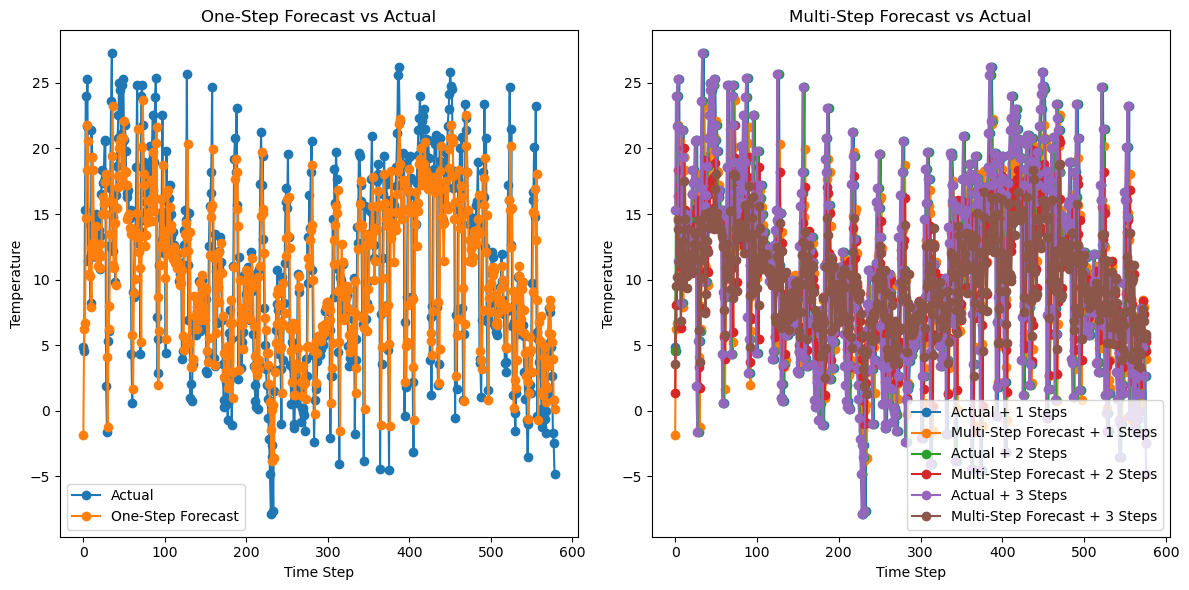

One-Step Forecast Evaluation:
MAE: 3.7583586532794686
MSE: 25.591176142659958
MAPE: 146.87813733623034%

Multi-Step Forecast Evaluation:
MAE: 4.629320569364961
MSE: 35.73834611592961
MAPE: 248.42490467892304%


In [14]:
# Assuming 'temperature' is your target variable
forecast_horizon = 3  # Number of steps to forecast into the future

# Apply sliding window transformation to testing data for both one-step and multi-step forecasting
X_test_one_step, y_test_one_step = sliding_window(test['temperature'], n, 1)
X_test_multi, y_test_multi = sliding_window_multi(test['temperature'], n, forecast_horizon)

# Make predictions for one-step and multi-step forecasting
y_pred_one_step = model_lr.predict(X_test_one_step)
y_pred_multi = model_lr_multi.predict(X_test_multi)

# Plot predictions for each day against the test set
plt.figure(figsize=(12, 6))

# Plot one-step predictions
plt.subplot(1, 2, 1)
plt.plot(y_test_one_step.flatten(), label='Actual', marker='o')
plt.plot(y_pred_one_step.flatten(), label='One-Step Forecast', marker='o')
plt.title('One-Step Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()

# Plot multi-step predictions
plt.subplot(1, 2, 2)
for i in range(forecast_horizon):
    plt.plot(y_test_multi[:, i], label=f'Actual + {i+1} Steps', marker='o')
    plt.plot(y_pred_multi[:, i], label=f'Multi-Step Forecast + {i+1} Steps', marker='o')
plt.title('Multi-Step Forecast vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate one-step forecast
mae_one_step = mean_absolute_error(y_test_one_step.flatten(), y_pred_one_step.flatten())
mse_one_step = mean_squared_error(y_test_one_step.flatten(), y_pred_one_step.flatten())
mape_one_step = calculate_mape(y_test_one_step.flatten(), y_pred_one_step.flatten())

# Evaluate multi-step forecast
mae_multi_step = mean_absolute_error(y_test_multi.flatten(), y_pred_multi.flatten())
mse_multi_step = mean_squared_error(y_test_multi.flatten(), y_pred_multi.flatten())
mape_multi_step = calculate_mape(y_test_multi.flatten(), y_pred_multi.flatten())

print("One-Step Forecast Evaluation:")
print(f"MAE: {mae_one_step}")
print(f"MSE: {mse_one_step}")
print(f"MAPE: {mape_one_step}%")

print("\nMulti-Step Forecast Evaluation:")
print(f"MAE: {mae_multi_step}")
print(f"MSE: {mse_multi_step}")
print(f"MAPE: {mape_multi_step}%")